>Simple Regression Techniques in Python

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sb
sb.set()

>MENAMPILKAN DATA USDIDR DARI 2021/2024

In [2]:
df = pd.read_csv('USDIDR_data1.csv')
df

,datetime,symbol,open,high,low,close,volume
0,2021-11-15,FUSIONMARKETS:USDIDR,14226.3,14323.0,14114.1,14298.0,7160.0
1,2021-11-22,FUSIONMARKETS:USDIDR,14272.5,14490.1,14257.7,14452.0,13910.0
2,2021-11-29,FUSIONMARKETS:USDIDR,14378.8,14537.3,14323.0,14508.8,21060.0
3,2021-12-06,FUSIONMARKETS:USDIDR,14494.3,14523.6,13965.4,14394.0,13529.0
4,2021-12-13,FUSIONMARKETS:USDIDR,14379.2,14417.5,14059.6,14396.3,17632.0
...,...,...,...,...,...,...,...
125,2024-04-15,FUSIONMARKETS:USDIDR,16116.6,16363.1,16101.2,16227.4,33910.0
126,2024-04-22,FUSIONMARKETS:USDIDR,16226.3,16283.9,16092.2,16245.0,26969.0
127,2024-04-29,FUSIONMARKETS:USDIDR,16242.6,16294.8,15900.0,15972.6,18847.0
128,2024-05-06,FUSIONMARKETS:USDIDR,15989.4,16111.2,15987.8,16078.5,12482.0


>MENGHAPUS KOLOM YANG TIDAK DI PERLUKAN

In [8]:
if all(col in df.columns for col in ['symbol', 'open', 'high', 'low', 'volume']):
    df.drop(columns=['symbol', 'open', 'high', 'low', 'volume'], inplace=True)

In [5]:
df

,datetime,close
0,2021-11-15,14298.0
1,2021-11-22,14452.0
2,2021-11-29,14508.8
3,2021-12-06,14394.0
4,2021-12-13,14396.3
...,...,...
125,2024-04-15,16227.4
126,2024-04-22,16245.0
127,2024-04-29,15972.6
128,2024-05-06,16078.5


>MELAKUKAN CLEANING DATA TERMASUK MENGHAPUS DATA NAN ATAU NULL

In [6]:
if df.isnull().values.any():
    df_cleaned = df.dropna()
    print("Data berhasil dibersihkan. Baris dengan nilai kosong telah dihapus.")
else:
    print("Tidak ada data kosong. Data aman.")

Tidak ada data kosong. Data aman.


>MELAKUKAN NORMALISASI DATA 

In [12]:
features_to_normalize = ['close']

In [18]:
for kolom in features_to_normalize:
    df[kolom] = df[kolom].apply(lambda x: int(x))

In [19]:
df_cleaned = df.copy()
scaler = StandardScaler()
df_cleaned[features_to_normalize] = scaler.fit_transform(df_cleaned[features_to_normalize])

In [20]:
df

,datetime,close
0,2021-11-15,14298
1,2021-11-22,14452
2,2021-11-29,14508
3,2021-12-06,14394
4,2021-12-13,14396
...,...,...
125,2024-04-15,16227
126,2024-04-22,16245
127,2024-04-29,15972
128,2024-05-06,16078


>VISUALISASI DATA PREDICTION BERDASARKAN PERHITUNGAN ALGORITMA REGRESI LINIER

In [21]:
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)

In [22]:
df['returns'] = df['close'].pct_change()
df['position'] = np.where(df['returns'] > 0, 1, -1)

In [23]:
df['strat_return'] = df['returns'] * df['position'].shift()

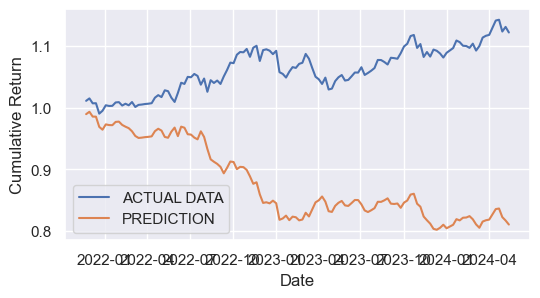

In [24]:
plt.figure(figsize=(6,3))
plt.plot(np.exp(df['returns'].dropna()).cumprod(), label='ACTUAL DATA')
plt.plot(np.exp(df['strat_return'].dropna()).cumprod(), label='PREDICTION')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [25]:
time = np.arange(1, len(df) + 1)
df['time'] = time
df = df[['time', 'close']]
df = round(df, 2)
df

,time,close
datetime,,
2021-11-15,1,14298
2021-11-22,2,14452
2021-11-29,3,14508
2021-12-06,4,14394
2021-12-13,5,14396
...,...,...
2024-04-15,126,16227
2024-04-22,127,16245
2024-04-29,128,15972


In [26]:
time = df['time'].values
close_price = df['close'].values

In [27]:
reg = np.polyfit(np.arange(len(time)), close_price, 1)
trend = np.polyval(reg, np.arange(len(time)))

In [29]:
std = close_price[-63:].std()

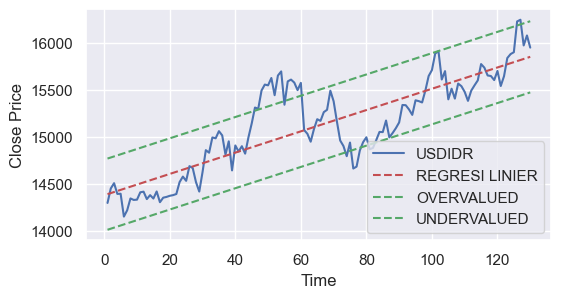

In [30]:
plt.figure(figsize=(6,3))
plt.plot(time, close_price, label="USDIDR")
plt.plot(time, trend, 'r--', label="REGRESI LINIER")
plt.plot(time, trend - std, 'g--', label="OVERVALUED")
plt.plot(time, trend + std, 'g--', label="UNDERVALUED")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [31]:
predict = np.poly1d(reg)
predict(12000)

150162.10860178398

<Axes: xlabel='time', ylabel='close'>

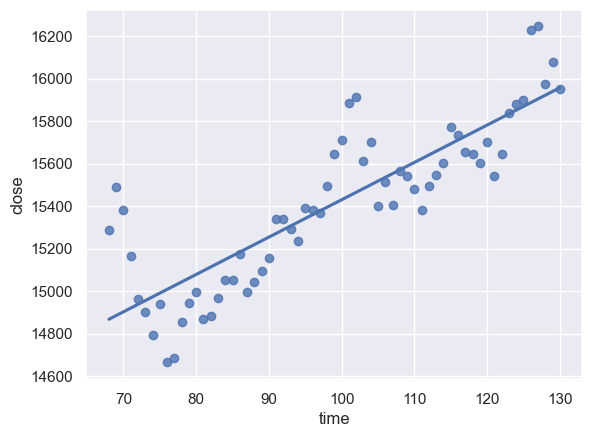

In [32]:
sb.regplot(x='time', y='close', ci=None, fit_reg=True, data=df[-63:])